In [1]:
import os
import torch
import pandas as pd
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils

import sys
sys.path.append('../src/data')
sys.path.append('..')

from datasets import CelebaDataset
import landmark_transforms

In [2]:
data_loc = '/home/data/celeba/'

In [3]:
dataset = CelebaDataset(data_loc + 'list_landmarks_celeba.txt', data_loc + 'list_attr_celeba.txt', data_loc + 'images',
                        transform=transforms.ToTensor(), 
                        landmark_transform=transforms.Compose([
                            landmark_transforms.Rescale(224),
                            landmark_transforms.NormalizeLandmarks()
                        ]))

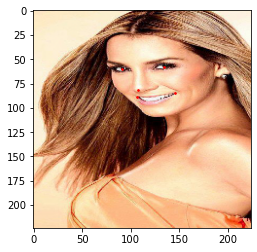

In [4]:
def show_landmarks(image, landmarks):
    """Show image with landmarks"""
    plt.imshow(transforms.ToPILImage()(image))
    plt.scatter(landmarks[:, 0] * image.shape[-1], landmarks[:, 1] * image.shape[-2], s=10, marker='.', c='r')
    plt.pause(0.001)  # pause a bit so that plots are updated

plt.figure()
show_landmarks(dataset[0]['image'], dataset[0]['landmarks'])
plt.show()

In [ ]:
fig = plt.figure()

for i in range(len(dataset)):
    sample = dataset[i]

    ax = plt.subplot(1, 4, i + 1)
    plt.tight_layout()
    ax.set_title('Sample #{}'.format(i))
    ax.axis('off')
    show_landmarks(sample['image'], sample['landmarks'])

    if i == 3:
        plt.show()
        break